In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, factor=.3, noise=.05)

reds = y == 0
blues = y == 1

Text(0,0.5,'$x_2$')

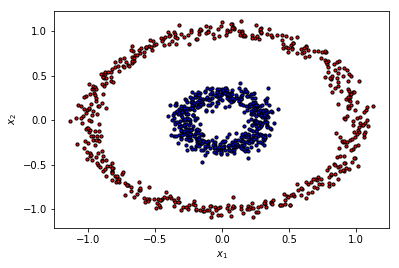

In [3]:
plt.scatter(X[reds, 0], X[reds, 1], c="red", s=10, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue", s=10, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

In [4]:
from sklearn.cluster import KMeans

Text(0,0.5,'$x_2$')

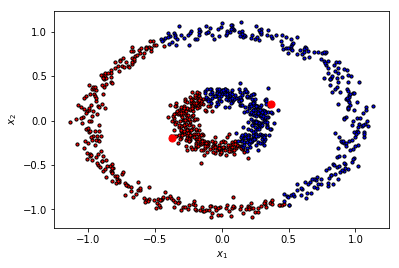

In [5]:
kmeans = KMeans(n_clusters = 2, random_state = 0)                   
kmeans.fit_predict(X)
k_reds = kmeans.labels_ == 0
k_blues = kmeans.labels_ == 1
plt.scatter(X[k_reds, 0], X[k_reds, 1], c="red", s=10, edgecolor='k')
plt.scatter(X[k_blues, 0], X[k_blues, 1], c="blue", s=10, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'red')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

In [6]:
from sklearn.datasets import make_blobs

[0 0 1 0 1 0 0 0 1 1 0 2 0 0 1 2 0 1 1 2 0 0 0 2 1 2 2 1 2 1 0 0 2 2 1]


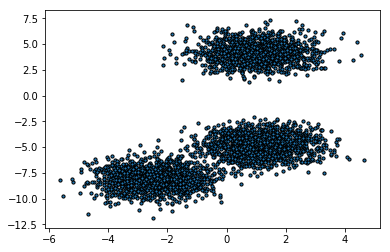

In [7]:
n=4000
X, y = make_blobs(n_samples = n, n_features = 17,random_state = 3)
plt.scatter(X[:,0], X[:,1], s=10, edgecolor='k')
print(y[:35])

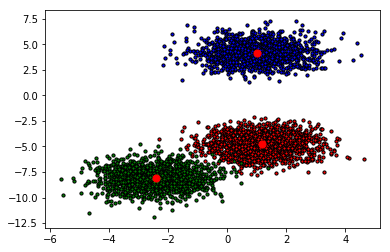

In [8]:
kmeans = KMeans(n_clusters = 3, random_state = 0)                   
kmeans.fit_predict(X)

k_reds = kmeans.labels_ == 0
k_blues = kmeans.labels_ == 1
k_greens = kmeans.labels_ == 2

plt.scatter(X[k_reds, 0], X[k_reds, 1], c="red", s=10, edgecolor='k')
plt.scatter(X[k_blues, 0], X[k_blues, 1], c="blue", s=10, edgecolor='k')
plt.scatter(X[k_greens, 0], X[k_greens, 1], c="green", s=10, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'red')

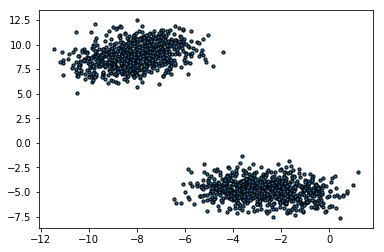

In [9]:
n=1500
X, y = make_blobs(n_samples = n, n_features = 17,random_state = 1001, centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True)
plt.scatter(X[:,0], X[:,1], s=10, edgecolor='k')

[0 1 0 2 2 2 3 1 0 1 0 0 0 1 2 3 3 3 0 2]


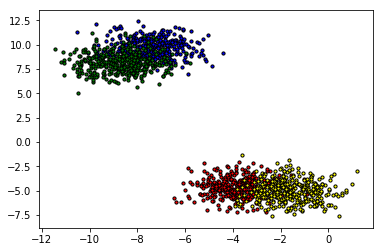

In [10]:
print(y[:20])
reds = y == 0
blues = y == 1
greens = y == 2
yellow = y == 3

plt.scatter(X[reds, 0], X[reds, 1], c="red", s=10, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue", s=10, edgecolor='k')
plt.scatter(X[greens, 0], X[greens, 1], c="green", s=10, edgecolor='k')
plt.scatter(X[yellow, 0], X[yellow, 1], c="yellow", s=10, edgecolor='k')

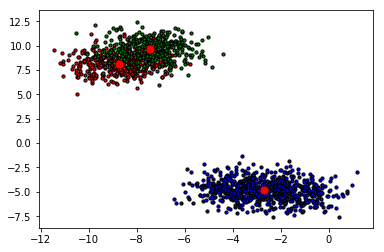

In [11]:
kmeans = KMeans(n_clusters = 3, random_state = 0)                   
kmeans.fit_predict(X)

k_reds = kmeans.labels_ == 0
k_blues = kmeans.labels_ == 1
k_greens = kmeans.labels_ == 2

plt.scatter(X[k_reds, 0], X[k_reds, 1], c="red", s=10, edgecolor='k')
plt.scatter(X[k_blues, 0], X[k_blues, 1], c="blue", s=10, edgecolor='k')
plt.scatter(X[k_greens, 0], X[k_greens, 1], c="green", s=10, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'red')

### Plotly
[plotly](https://plot.ly/feed/#/)

```sh
> pip install plotly

> pip install plotly --upgrade
```

### Plotly API key
Generate your API key [here](https://plot.ly/settings/api#/)

### Use Case
```python
import plotly
plotly.tools.set_credentials_file(username='DemoAccount', api_key='lr1c37zw81')
```


In [12]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
plotly.tools.set_credentials_file(username='cubazis', api_key='SYxfBgb5FRJR8sLir6LE')
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

Automatically created module for IPython interactive environment


In [13]:
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

In [14]:
figures = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig = tools.make_subplots(rows=1, cols=2,
                              print_grid=False,
                              subplot_titles=('The silhouette plot for the various clusters.',
                                              'The visualization of the clustered data.'))

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    fig['layout']['xaxis1'].update(title='The silhouette coefficient values',
                                   range=[-0.1, 1])
   
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    fig['layout']['yaxis1'].update(title='Cluster label',
                                   showticklabels=False,
                                   range=[0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        
        filled_area = go.Scatter(y=np.arange(y_lower, y_upper),
                                 x=ith_cluster_silhouette_values,
                                 mode='lines',
                                 showlegend=False,
                                 line=dict(width=0.5,
                                          color=colors),
                                 fill='tozerox')
        fig.append_trace(filled_area, 1, 1)
        
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        

    # The vertical line for average silhouette score of all the values
    axis_line = go.Scatter(x=[silhouette_avg],
                           y=[0, len(X) + (n_clusters + 1) * 10],
                           showlegend=False,
                           mode='lines',
                           line=dict(color="red", dash='dash',
                                     width =1) )

    fig.append_trace(axis_line, 1, 1)
    
    # 2nd Plot showing the actual clusters formed
    colors = matplotlib.colors.colorConverter.to_rgb(cm.nipy_spectral(float(i) / n_clusters))
    colors = 'rgb'+str(colors)
    clusters = go.Scatter(x=X[:, 0], 
                          y=X[:, 1], 
                          showlegend=False,
                          mode='markers',
                          marker=dict(color=colors,
                                     size=4)
                         )
    fig.append_trace(clusters, 1, 2)
    
    # Labeling the clusters
    centers_ = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    centers = go.Scatter(x=centers_[:, 0], 
                         y=centers_[:, 1],
                         showlegend=False,
                         mode='markers',
                         marker=dict(color='green', size=10,
                                     line=dict(color='black',
                                                             width=1))
                        )

    fig.append_trace(centers, 1, 2)
    
    fig['layout']['xaxis2'].update(title='Feature space for the 1st feature',
                                   zeroline=False)
    fig['layout']['yaxis2'].update(title='Feature space for the 2nd feature',
                                  zeroline=False)
                              

    fig['layout'].update(title="Silhouette analysis for KMeans clustering on sample data "
                         "with n_clusters = %d" % n_clusters)
    
    figures.append(fig)

For n_clusters = 2 The average silhouette_score is : 0.7049787496083261
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765
For n_clusters = 7 The average silhouette_score is : 0.39092211029930857
For n_clusters = 8 The average silhouette_score is : 0.3314853899648912


In [15]:
py.iplot(figures[0])

PlotlyRequestError: Account limit reached: Your account is limited to creating 25 charts. To continue, you can override or delete existing charts or you can upgrade your account at: https://plot.ly/products/cloud

In [ ]:
py.iplot(figures[1])

In [ ]:
py.iplot(figures[4])